## Este notebook va a ser exclusivamente para analizar qué modelo de ML es más óptimo para nuestro dataset, generarlo, entrenarlo y guardarlo para usarlo en streamlit.

In [68]:
# Importamos las librerías
import pandas as pd
import numpy as np
from pycaret.regression import *
from fast_ml import eda
import seaborn as sns


In [69]:
# Cargamos el dataset quitando las columnas que no van a servir para entrenar el modelo.
valencia = pd.read_csv("data/valencia_barrio_municipio.csv")
valencia.drop('Municipio', axis =1, inplace=True)
valencia.drop('Unnamed: 0', axis=1, inplace=True)
valencia.drop('ID', axis=1, inplace=True)
valencia.drop('Preciom2', axis=1, inplace=True)
valencia.drop('Año_diseñado', axis=1, inplace=True)
valencia

,Precio,Metros_Construidos,Habitaciones,Baños,Terraza,Ascensor,Aire_Acondicionado,Servicios,Garaje,Garaje_en_Precio,...,Calidad_suelo,Plantas_máximas,Número_viviendas,Calidad_catastral,Distancia_centro,Distancia_metro,Distancia_Blasco,Latitud,Longitud,Barrio
0,111000.0,75,2,1,1,1,1,2,1,1,...,6,7,35,6,3.759093,0.756517,3.373132,39.500908,-0.393538,CIUTAT FALLERA
1,169000.0,128,4,2,0,1,1,3,1,1,...,3,7,56,5,2.073773,0.370680,0.540594,39.482599,-0.359125,BENIMACLET
2,162000.0,86,2,1,0,1,1,3,0,0,...,4,6,20,4,2.099641,0.038560,0.719203,39.485144,-0.362470,BENIMACLET
3,199000.0,111,4,2,0,1,0,3,0,0,...,4,8,25,5,2.120917,0.524827,0.915379,39.487445,-0.367417,BENIMACLET
4,73000.0,56,3,1,1,1,0,3,0,0,...,4,6,20,8,3.087950,1.129985,2.009535,39.497057,-0.370182,ELS ORRIOLS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33617,121000.0,120,3,2,0,1,1,3,0,0,...,2,4,13,5,2.800362,0.710564,2.607601,39.492210,-0.391340,BENICALAP
33618,136000.0,84,2,1,1,1,1,3,0,0,...,4,6,49,7,2.282765,0.321158,2.404973,39.486174,-0.392554,EL CALVARI
33619,98000.0,113,2,2,1,0,0,3,0,0,...,2,6,17,7,2.583955,0.661318,2.510628,39.489754,-0.391909,BENICALAP
33620,45000.0,68,3,1,0,0,0,3,0,0,...,1,6,41,7,3.420772,0.529830,3.305286,39.495606,-0.398167,BENICALAP


Únicamente tenemos una columna que debemos encodear, ya que la hemos añadido recientemente. El resto del dataframe está encodeado previamente en el preprocesamiento del mismo. Vamos a usar la librería sklearn para encodear dicha columna.

In [70]:
# Importamos LabelEncoder.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Lo aplicamos a nuestra columna sin encodear.
valencia['Barrio'] = le.fit_transform(valencia['Barrio'])

# Mostramos para comprobarlo un head.
valencia.head(8)

,Precio,Metros_Construidos,Habitaciones,Baños,Terraza,Ascensor,Aire_Acondicionado,Servicios,Garaje,Garaje_en_Precio,...,Calidad_suelo,Plantas_máximas,Número_viviendas,Calidad_catastral,Distancia_centro,Distancia_metro,Distancia_Blasco,Latitud,Longitud,Barrio
0,111000.0,75,2,1,1,1,1,2,1,1,...,6,7,35,6,3.759093,0.756517,3.373132,39.500908,-0.393538,14
1,169000.0,128,4,2,0,1,1,3,1,1,...,3,7,56,5,2.073773,0.370680,0.540594,39.482599,-0.359125,5
2,162000.0,86,2,1,0,1,1,3,0,0,...,4,6,20,4,2.099641,0.038560,0.719203,39.485144,-0.362470,5
3,199000.0,111,4,2,0,1,0,3,0,0,...,4,8,25,5,2.120917,0.524827,0.915379,39.487445,-0.367417,5
4,73000.0,56,3,1,1,1,0,3,0,0,...,4,6,20,8,3.087950,1.129985,2.009535,39.497057,-0.370182,24
5,45000.0,65,3,1,0,0,0,3,0,0,...,1,6,174,8,2.723051,0.950909,1.624347,39.493621,-0.369603,24
6,81000.0,80,3,1,0,1,0,3,0,0,...,4,6,47,7,2.967437,0.936006,1.837951,39.495687,-0.368560,24
7,85000.0,92,4,1,0,0,0,3,0,0,...,1,5,21,7,2.744555,1.080070,1.697090,39.494040,-0.371029,24


In [61]:
# Imprimo las clases del encoder ya que posteriormente necesitaré saber a que otorgó cada valor.
print(le.classes_)

['AIORA' 'ALBORS' 'ARRANCAPINS' 'BENICALAP' 'BENIFERRI' 'BENIMACLET'
 'BENIMAMET' 'BETERO' 'CABANYAL-CANYAMELAR' 'CAMI DE VERA' 'CAMI FONDO'
 'CAMI REAL' 'CAMPANAR' 'CIUTAT DE LES ARTS I DE LES CIENCIES'
 'CIUTAT FALLERA' 'CIUTAT JARDI' 'CIUTAT UNIVERSITARIA' 'EL BOTANIC'
 'EL CALVARI' 'EL CARME' 'EL GRAU' 'EL MERCAT' 'EL PILAR'
 'EL PLA DEL REMEI' 'ELS ORRIOLS' 'EN CORTS' 'EXPOSICIO' 'FAVARA'
 'JAUME ROIG' "L'AMISTAT" "L'HORT DE SENABRE" "L'ILLA PERDUDA"
 'LA CARRASCA' 'LA CREU COBERTA' 'LA CREU DEL GRAU' 'LA FONTETA S.LLUIS'
 'LA FONTSANTA' 'LA GRAN VIA' 'LA LLUM' 'LA MALVA-ROSA' 'LA PETXINA'
 'LA PUNTA' 'LA RAIOSA' 'LA ROQUETA' 'LA SEU' 'LA VEGA BAIXA' 'LA XEREA'
 'LES TENDETES' 'MALILLA' 'MARXALENES' 'MESTALLA' 'MONT-OLIVET' 'MORVEDRE'
 'NA ROVELLA' 'NATZARET' 'NOU MOLES' 'PATRAIX' 'PENYA-ROJA' 'POBLE NOU'
 'RUSSAFA' 'SAFRANAR' 'SANT ANTONI' 'SANT FRANCESC' 'SANT ISIDRE'
 'SANT LLORENS' 'SANT MARCEL.LI' 'SANT PAU' 'SOTERNES' 'TORMOS'
 'TORREFIEL' 'TRES FORQUES' 'TRINITAT' 'VARA DE 

Ahora procedemos a identificar los outliers o valores atípicos que tenemos para las diferentes columnas.

Un outlier o valor atípico es un punto de datos que difiere significativamente del resto de los datos en un conjunto de datos. Estos valores pueden ser el resultado de errores de medición o pueden representar variaciones genuinas en los datos. Los outliers pueden afectar significativamente la precisión de los modelos estadísticos y de aprendizaje automático, y por lo tanto, es importante identificarlos y gestionarlos adecuadamente en el análisis de datos.

Para lidiar con ellos, se puede optar por varios métodos:

Eliminarlos: Si los valores atípicos son claramente errores de medición, se pueden eliminar del conjunto de datos. Sin embargo, si son el resultado de una variabilidad natural, eliminarlos puede sesgar el conjunto de datos.

Transformar los datos: En algunos casos, se pueden transformar los datos para hacerlos más normales y, por lo tanto, reducir la presencia de valores atípicos.

Usar métodos robustos: Algunos algoritmos son más robustos a los valores atípicos que otros, por lo que elegir el algoritmo correcto puede reducir su impacto.

En este caso, primero se debe determinar si los valores atípicos son errores de medición o una variabilidad natural. Si son errores de medición, se pueden eliminar. Si son una variabilidad natural, se puede utilizar alguno de los métodos anteriores para reducir su impacto en el análisis.

In [62]:
# Identificar columnas numéricas
cols_numericas = valencia.select_dtypes(include='number').columns

# Calcular la media y desviación estándar de cada columna numérica
medias = valencia[cols_numericas].mean()
stds = valencia[cols_numericas].std()

# Definir umbral de 3 desviaciones estándar para detectar outliers
umbral = 3

# Identificar valores atípicos para cada columna numérica
outliers = {}
for col in cols_numericas:
    mascara = abs(valencia[col] - medias[col]) > umbral * stds[col]
    outliers[col] = valencia[mascara][col]

# Imprimir valores atípicos para cada columna numérica
for col, valores in outliers.items():
    print(f"Valores atípicos en '{col}':\n{valores}\n")


Valores atípicos en 'Precio':
32        755000.0
72        795000.0
74        866000.0
90        922000.0
114       800000.0
           ...    
30446     796000.0
31455    1365000.0
31650     737000.0
32207     735000.0
33009     755000.0
Name: Precio, Length: 663, dtype: float64

Valores atípicos en 'Metros_Construidos':
116      289
121      296
123      289
185      358
187      300
        ... 
33281    252
33282    252
33284    252
33285    269
33286    252
Name: Metros_Construidos, Length: 556, dtype: int64

Valores atípicos en 'Habitaciones':
382      7
656      7
718      7
753      7
755      8
        ..
27883    9
27920    7
27976    7
28108    7
30979    7
Name: Habitaciones, Length: 129, dtype: int64

Valores atípicos en 'Baños':
72       4
121      4
185      5
187      4
328      4
        ..
33284    4
33285    4
33286    4
33287    4
33289    4
Name: Baños, Length: 280, dtype: int64

Valores atípicos en 'Terraza':
Series([], Name: Terraza, dtype: int64)

Valores atípic

Lo que vamos a hacer en este caso es transformar los outliers y reemplazarlos usando la siguiente función que se ve a continuación. Esto nos permitirá tener un modelo más ajustado y preciso.

In [63]:
def replace_outliers(df, f=1.5):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include='number').columns
    
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - f * IQR
    upper_bound = Q3 + f * IQR
    
    for col in numeric_cols:
        df.loc[df[col] < lower_bound[col], col] = lower_bound[col]
        df.loc[df[col] > upper_bound[col], col] = upper_bound[col]
    
    return df
replace_outliers(valencia)

,Precio,Metros_Construidos,Habitaciones,Baños,Terraza,Ascensor,Aire_Acondicionado,Servicios,Garaje,Garaje_en_Precio,...,Calidad_suelo,Plantas_máximas,Número_viviendas,Calidad_catastral,Distancia_centro,Distancia_metro,Distancia_Blasco,Latitud,Longitud,Barrio
0,111000.0,75.0,2.0,1.0,1.0,1,1.0,3,0,0,...,6,7.0,35.0,6.0,3.759093,0.756517,3.373132,39.500908,-0.393538,14.0
1,169000.0,128.0,4.0,2.0,0.0,1,1.0,3,0,0,...,3,7.0,56.0,5.0,2.073773,0.370680,0.540594,39.482599,-0.359125,5.0
2,162000.0,86.0,2.0,1.0,0.0,1,1.0,3,0,0,...,4,6.0,20.0,4.0,2.099641,0.038560,0.719203,39.485144,-0.362470,5.0
3,199000.0,111.0,4.0,2.0,0.0,1,0.0,3,0,0,...,4,8.0,25.0,5.0,2.120917,0.524827,0.915379,39.487445,-0.367417,5.0
4,73000.0,56.0,3.0,1.0,1.0,1,0.0,3,0,0,...,4,6.0,20.0,8.0,3.087950,1.129985,2.009535,39.497057,-0.370182,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33617,121000.0,120.0,3.0,2.0,0.0,1,1.0,3,0,0,...,2,4.0,13.0,5.0,2.800362,0.710564,2.607601,39.492210,-0.391340,3.0
33618,136000.0,84.0,2.0,1.0,1.0,1,1.0,3,0,0,...,4,6.0,49.0,7.0,2.282765,0.321158,2.404973,39.486174,-0.392554,18.0
33619,98000.0,113.0,2.0,2.0,1.0,1,0.0,3,0,0,...,2,6.0,17.0,7.0,2.583955,0.661318,2.510628,39.489754,-0.391909,3.0
33620,45000.0,68.0,3.0,1.0,0.0,1,0.0,3,0,0,...,1,6.0,41.0,7.0,3.420772,0.529830,3.305286,39.495606,-0.398167,3.0


In [64]:
valencia.to_csv("coded_valencia.csv")

In [25]:
# Usando librería de fastml vemos como queda el dataframe.
eda.df_info(valencia)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Precio,float64,Numerical,415,"[111000.0, 169000.0, 162000.0, 199000.0, 73000...",0,0.0
Metros_Construidos,float64,Numerical,162,"[75.0, 128.0, 86.0, 111.0, 56.0, 65.0, 80.0, 9...",0,0.0
Habitaciones,float64,Numerical,6,"[2.0, 4.0, 3.0, 1.5, 5.0, 5.5]",0,0.0
Baños,float64,Numerical,5,"[1.0, 2.0, 3.5, 3.0, 0.0]",0,0.0
Terraza,float64,Numerical,2,"[1.0, 0.0]",0,0.0
Ascensor,int64,Numerical,1,[1],0,0.0
Aire_Acondicionado,float64,Numerical,2,"[1.0, 0.0]",0,0.0
Servicios,int64,Numerical,1,[3],0,0.0
Garaje,int64,Numerical,1,[0],0,0.0
Garaje_en_Precio,int64,Numerical,1,[0],0,0.0


In [26]:
# Creamos nuestro setup con la columna objetivo
setup = setup(valencia, target='Precio', session_id=323)

,Description,Value
0,Session id,323
1,Target,Precio
2,Target type,Regression
3,Original data shape,"(33622, 34)"
4,Transformed data shape,"(33622, 34)"
5,Transformed train set shape,"(23535, 34)"
6,Transformed test set shape,"(10087, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


* Session id: Identificador único de la sesión, que se utiliza para identificar y mantener la consistencia entre los diferentes pasos del proceso.
* Target: Variable objetivo de la predicción, que en este caso es "Precio".
* Target type: Tipo de variable objetivo, que en este caso es "Regression" (regresión).
* Original data shape: Forma original del conjunto de datos antes de cualquier transformación, que tiene una longitud de 33,622 filas y 36 columnas.
* Transformed data shape: Forma del conjunto de datos después de la transformación, que tiene la misma longitud y columnas que el conjunto de datos original.
* Transformed train set shape: Forma del conjunto de entrenamiento después de la transformación, que tiene 23,535 filas y 36 columnas.
* Transformed test set shape: Forma del conjunto de prueba después de la transformación, que tiene 10,087 filas y 36 columnas.
* Numeric features: Número de características numéricas en el conjunto de datos, que es de 35.
* Preprocess: Indica si se ha preprocesado o no el conjunto de datos.
* Imputation type: Tipo de imputación de valores faltantes, que en este caso es "simple".
* Numeric imputation: Método utilizado para imputar los valores faltantes en las características numéricas, que en este caso es el promedio (mean).
* Categorical imputation: Método utilizado para imputar los valores faltantes en las características categóricas, que en este caso es la moda (mode).
* Fold Generator: Método utilizado para generar los pliegues en la validación cruzada, que en este caso es "KFold".
* Fold Number: Número de pliegues utilizados en la validación cruzada, que en este caso es 10.
* CPU Jobs: Número de núcleos de CPU utilizados para el entrenamiento, que en este caso es -1 (todos los núcleos disponibles).
* Use GPU: Indica si se ha utilizado o no una GPU para el entrenamiento, que en este caso es "False".
* Log Experiment: Indica si se ha registrado o no el experimento, que en este caso es "False".
* Experiment Name: Nombre del experimento, que en este caso es "reg-default-name".
* USI: Identificador único del experimento, que se utiliza para identificar y mantener la consistencia entre los diferentes pasos del proceso.

In [27]:
# Evaluamos los modelos para identificar el más preciso para nuestro caso.
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:29:01
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [28]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=323)


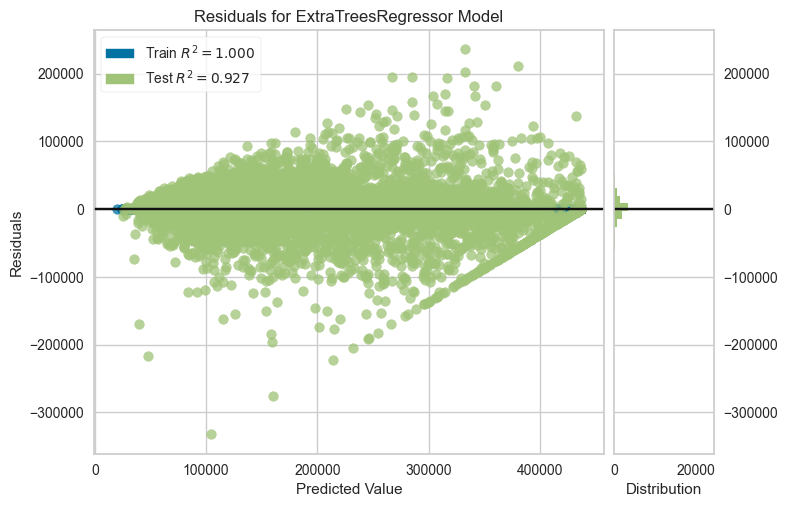

In [29]:
# Mostramos gráficamente la matriz de confusión.
plot_model(best)

El Train R^2 es una medida de la bondad de ajuste del modelo, que indica cuánta variabilidad en los datos de entrenamiento se explica por el modelo. Un valor de 1.0 significa que el modelo es capaz de explicar el 100% de la variabilidad en los datos de entrenamiento.

El Test R^2 es una medida de la capacidad predictiva del modelo, que indica cuánta variabilidad en los datos de prueba se explica por el modelo. Un valor de 0.927 significa que el modelo es capaz de explicar el 92.7% de la variabilidad en los datos de prueba. Esto sugiere que el modelo tiene un buen rendimiento en la predicción de nuevas observaciones fuera del conjunto de datos de entrenamiento.

In [30]:
# Predición modelo.
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,18118.2958,888990743.6354,29815.9478,0.9270,0.1805,0.1233


MAE (Mean Absolute Error): Es el error promedio absoluto entre los valores predichos por el modelo y los valores reales. En este caso, el valor obtenido es de 18118.2958, lo que significa que en promedio, las predicciones del modelo difieren en 18118.2958 unidades del valor real.

MSE (Mean Squared Error): Es el error cuadrático medio entre las predicciones del modelo y los valores reales. En este caso, el valor obtenido es de 888990743.6354, lo que indica que en promedio, el modelo se equivoca en 888990743.6354 unidades al cuadrado al realizar sus predicciones.

RMSE (Root Mean Squared Error): Es la raíz cuadrada del MSE. En este caso, el valor obtenido es de 29815.9478, lo que significa que en promedio, el modelo se equivoca en 29815.9478 unidades al realizar sus predicciones.

R2 (Coeficiente de determinación): Es una medida que indica cuánta variabilidad de los datos puede explicar el modelo. El valor obtenido es de 0.9270, lo que indica que el modelo es capaz de explicar el 92.7% de la variabilidad de los datos.

RMSLE (Root Mean Squared Logarithmic Error): Es la raíz cuadrada del error cuadrático medio de los logaritmos de las predicciones y los valores reales. Este valor es útil cuando las variables de entrada tienen una distribución de cola pesada y los valores reales son muy grandes. El valor obtenido es de 0.1805.

MAPE (Mean Absolute Percentage Error): Es el error porcentual promedio entre las predicciones del modelo y los valores reales. En este caso, el valor obtenido es de 0.1233, lo que significa que en promedio, las predicciones del modelo difieren en un 12.33% del valor real.

In [31]:
# Finalizado el modelo.

finalize_model(best)

# Guardo el modelo.

save_model(best, 'Precios_vivienda_valencia')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/pv/gvnhf98x387cdv8tp25d9wxw0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Metros_Construidos',
                                              'Habitaciones', 'Baños', 'Terraza',
                                              'Ascensor', 'Aire_Acondicionado',
                                              'Servicios', 'Garaje',
                                              'Garaje_en_Precio',
                                              'Precio_garaje',
                                              'Orientación_norte',
                                              'Orientación_sur',
                                              'Orientación_este',
                                              'O...
                                              'Calidad_catastral',
                                              'Distancia_centro',
                                              'Distanci